# Get the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/train.csv')
X = data.drop('target', axis = 1)
y = data['target']

# Convert the 'last contact date' column to 3 seperate columns

In [ ]:
X['last contact date'] = pd.to_datetime(X['last contact date'])

X['Month'] = X['last contact date'].dt.month
X['Date'] = X['last contact date'].dt.day
X['Year'] = X['last contact date'].dt.year

X = X.drop('last contact date', axis = 1)

X['Month'] = X['Month'].astype('object')
X['Date'] = X['Date'].astype('object')
X['Year'] = X['Year'].astype('object')

# Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Month,Date,Year
15450,64,entrepreneur,divorced,secondary,no,46599,yes,yes,cellular,4174,51,126,6,failure,9,6,2008
7609,45,management,married,tertiary,no,623,no,no,cellular,405,3,-1,0,NaN,9,9,2008
21983,59,retired,married,secondary,no,836,yes,no,NaN,106,1,-1,0,NaN,5,7,2009
13917,41,blue-collar,married,secondary,no,113,no,no,cellular,92,15,-1,0,NaN,7,25,2008
20991,34,services,married,secondary,no,145,no,yes,cellular,152,2,-1,0,NaN,7,22,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,52,management,married,secondary,no,428,yes,no,NaN,153,1,-1,0,NaN,5,30,2008
23322,28,entrepreneur,divorced,primary,no,13505,yes,yes,cellular,1143,28,708,84,other,1,8,2010
3638,37,technician,married,secondary,no,1580,no,no,cellular,92,12,-1,0,NaN,8,22,2010
20677,28,admin.,married,secondary,no,423,yes,no,cellular,245,1,-1,0,NaN,7,23,2008


In [ ]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Month,Date,Year
17348,58,blue-collar,married,secondary,no,266,yes,no,NaN,319,6,-1,0,NaN,6,5,2008
37201,47,unemployed,married,secondary,no,2024,no,no,NaN,169,1,-1,0,NaN,6,9,2009
19151,54,retired,divorced,primary,no,22,no,no,NaN,23,4,-1,0,NaN,6,20,2010
27503,43,admin.,single,secondary,no,985,yes,yes,NaN,51,19,-1,0,NaN,6,20,2009
8861,37,entrepreneur,married,tertiary,no,342,yes,no,NaN,212,1,-1,0,NaN,6,6,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12943,44,technician,married,secondary,no,0,yes,no,cellular,157,1,-1,0,NaN,7,24,2010
4735,33,entrepreneur,married,primary,no,237,yes,no,NaN,89,1,-1,0,NaN,5,23,2008
18914,36,blue-collar,single,secondary,no,690,yes,no,NaN,86,2,-1,0,NaN,5,23,2008
12713,40,technician,married,secondary,no,2576,yes,yes,NaN,10,11,-1,0,NaN,5,12,2009


# Preprocess the data (Impute the missing values, encode the categorical features and scale the numerical features)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'Month', 'Date', 'Year']
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False))
])

numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=
                  [
                      ('cat', categorical_pipeline, categorical_features),
                      ('num', numeric_pipeline, numeric_features)
                  ],
    remainder='passthrough'  # Keep any extra columns as is
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train = pd.DataFrame(X_train_transformed)
X_test = pd.DataFrame(X_test_transformed)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.715838,2.533854,4.859596,4.634881,0.341158,-0.130491
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.222042,-0.293338,-0.043916,-0.212328,-0.454164,-0.266457
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.322734,-0.280240,-0.432919,-0.414295,-0.454164,-0.266457
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.092442,-0.324699,-0.451133,0.999474,-0.454164,-0.266457
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.642788,-0.322731,-0.373072,-0.313311,-0.454164,-0.266457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27442,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.772388,-0.305329,-0.371771,-0.414295,-0.454164,-0.266457
27443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.114513,0.498812,0.916230,2.312260,3.985865,1.637069
27444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.406925,-0.234489,-0.451133,0.696524,-0.454164,-0.266457
27445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.114513,-0.305636,-0.252078,-0.414295,-0.454164,-0.266457


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.244113,-0.315291,-0.155803,0.090623,-0.454164,-0.266457
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.379283,-0.207186,-0.350955,-0.414295,-0.454164,-0.266457
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.929630,-0.330295,-0.540903,-0.111344,-0.454164,-0.266457
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.064800,-0.271077,-0.504474,1.403409,-0.454164,-0.266457
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.406925,-0.310617,-0.295011,-0.414295,-0.454164,-0.266457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.143421,-0.331648,-0.366567,-0.414295,-0.454164,-0.266457
11760,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.721409,-0.317074,-0.455036,-0.414295,-0.454164,-0.266457
11761,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.485546,-0.289218,-0.458939,-0.313311,-0.454164,-0.266457
11762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.171063,-0.173242,-0.557816,0.595540,-0.454164,-0.266457


# Encode the labels

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=['target'])

y_test = lb.fit_transform(y_test)
y_test = pd.DataFrame(y_test, columns=['target'])

In [ ]:
y_train.value_counts()

,count
target,
0,23368
1,4079


#1. Ridge Classifier - 0.6254

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC: 0.86


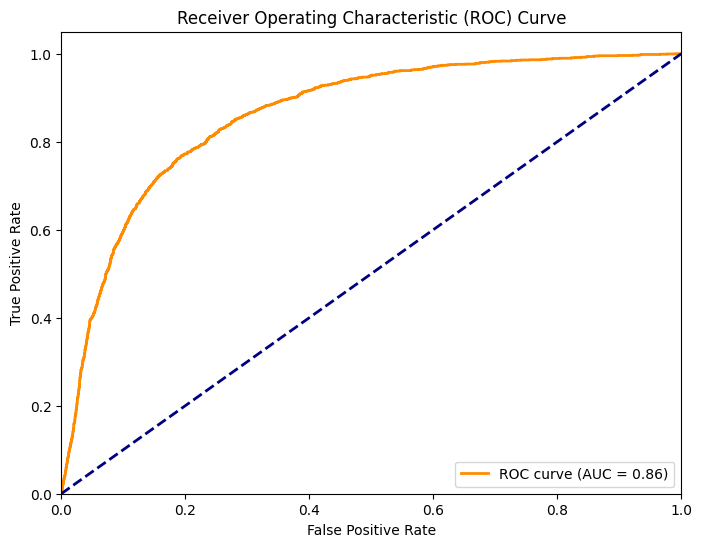

F1 Score: 0.6254401096734803


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are already defined
# Train the RidgeClassifier model
ridge_classifier = RidgeClassifier(alpha=0.1, solver='lsqr', fit_intercept=True)
ridge_classifier.fit(X_train, y_train)

# Get predicted probabilities (decision function scores for each class)
y_scores = ridge_classifier.decision_function(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print AUC
print(f'AUC: {roc_auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate F1 score
y_pred = ridge_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')


In [ ]:
from sklearn.metrics import roc_curve, auc

#2. Perceptron - 0.7216

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score

perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)

y_pred = perceptron_classifier.predict(X_test)

f1 = f1_score(y_test, y_pred, average = 'macro')
print(f'F1 Score: {f1}')

F1 Score: 0.7216104712212208


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#3. Logistic Regression - 0.7249

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logit_classifier = LogisticRegression(penalty=None, solver = 'newton-cg', class_weight = 'balanced')
logit_classifier.fit(X_train, y_train)

y_pred = logit_classifier.predict(X_test)

f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"F1 Score: {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.7249164362639678


#4. SGDClassifier - 0.64436


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
SGD_classifier = SGDClassifier(loss = 'log_loss')
SGD_classifier.fit(X_train, y_train)
y_pred = SGD_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"F1 Score : {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score : 0.6443609293870367


#5. Naive Bayes - 0.6948

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"F1 Score: {f1}")

F1 Score: 0.6961687631928999


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#6. K - Nearest Neighbors - 0.6579

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'auto')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"F1 Score: {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


F1 Score: 0.6579512078927154


#7. Support Vector Machines with randomized search cv - 0.7562

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# SVM with hyperparameter tuning
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

svc = SVC(class_weight='balanced', random_state=42)
svc_tuned = RandomizedSearchCV(svc, param_distributions=param_dist, scoring='f1_macro', cv=3, n_iter=10, random_state=42, n_jobs=-1)
svc_tuned.fit(X_train, y_train)

# Train the best SVM model
best_svc = svc_tuned.best_estimator_
y_pred_svc = best_svc.predict(X_test)
f1_svc = f1_score(y_test, y_pred_svc, average='macro')


# Results
print(f"Best SVM Params: {svc_tuned.best_params_}")
print(f"SVM F1 Score: {f1_svc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best SVM Params: {'kernel': 'rbf', 'gamma': 'auto', 'C': 0.1}
SVM F1 Score: 0.7562


#8. Decision Trees - 0.6859

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1}")

F1 Score: 0.6859995985900144


#9. Bagging Methods - 0.7712

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of combinations to try
    scoring='f1_macro',  # Optimize for F1 score (macro)
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV on training data
rf_random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_rf = rf_random_search.best_estimator_

# Predict on the test data
y_pred = best_rf.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average = 'macro')
print(f"F1 Score: {f1}")

F1 Score: 0.7433095405760353


In [ ]:
y_train

#10. Boosting Methods - 0.7619

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Compute scale_pos_weight based on class imbalance
pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, pos_weight, 2 * pos_weight]  # Include scale_pos_weight in hyperparameter search
}

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on training data
xgb_random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_xgb = xgb_random_search.best_estimator_

# Predict on the test data
y_pred = best_xgb.predict(X_test)

# Evaluate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print(f"Best Hyperparameters: {xgb_random_search.best_params_}")
print(f"F1 Score on Test Data: {f1:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:16:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.8}
F1 Score on Test Data: 0.7591


# 11. Multilayer Perceptron with randomizedsearchcv - 0.7334

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000],
}

# Initialize the model
mlp = MLPClassifier(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    scoring='f1_macro',
    n_iter=20,  # Number of combinations to try
    cv=3,       # Cross-validation splits
    random_state=42,
    n_jobs=-1   # Use all processors
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Predict using the best estimator
best_mlp = random_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Improved F1 Score: {f1}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Improved F1 Score: 0.733472095168994


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


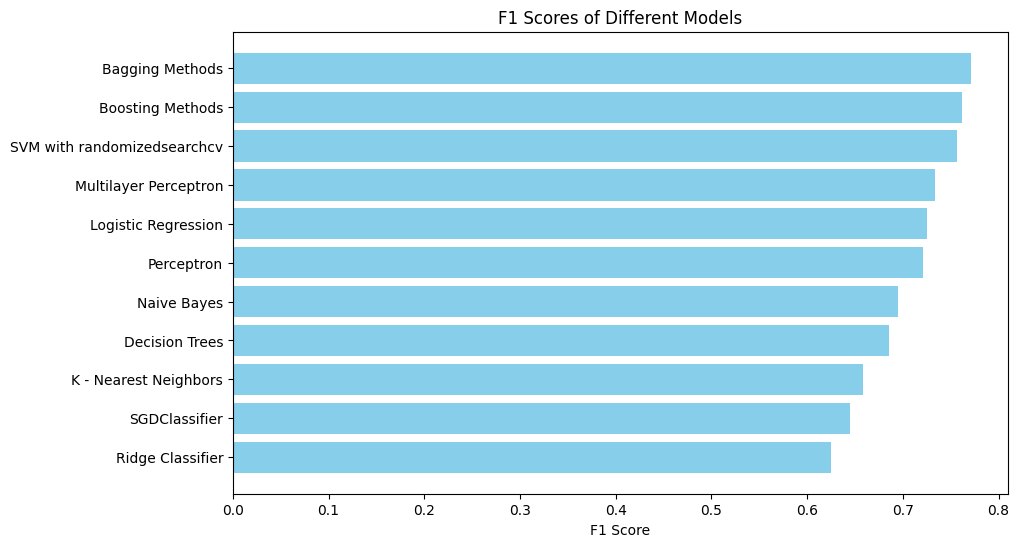

In [ ]:
import matplotlib.pyplot as plt

models = ['Ridge Classifier', 'SGDClassifier', 'K - Nearest Neighbors', 'Decision Trees',
          'Naive Bayes', 'Perceptron', 'Logistic Regression', 'Multilayer Perceptron',
          'SVM with randomizedsearchcv', 'Boosting Methods', 'Bagging Methods']

f1_scores = [0.6254, 0.64436, 0.6579, 0.6859, 0.6948, 0.7216, 0.7249, 0.7334, 0.7562, 0.7619, 0.7712]

plt.figure(figsize=(10, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Scores of Different Models')

# Display the plot
plt.show()
